In [7]:
from models.model_mil import MIL_fc, MIL_fc_mc
from models.model_clam import CLAM_MB, CLAM_SB
from models.multimodal import Multimodal
from models.model_porpoise import PorpoiseMMF
from models.model_coattn import MCAT_Surv
from models.model_SurvPath import SurvPath
import torch
import pandas as pd
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D  # Import Line2D for legend elements

In [8]:
# Assuming the model classes CLAM_SB, CLAM_MB, etc., are already defined/imported

def get_model_params_count(model):
    """Calculate the total number of parameters in a PyTorch model."""
    return sum(p.numel() for p in model.parameters())

# make sure the models vary size gien omic structre.... 
drop_out = 0
n_classes = 2
embed_dim = 384

omic_sizes=[60]
model_dict_60_flat = {"omic_sizes": omic_sizes, "dropout": drop_out, 'n_classes': n_classes, 'embed_dim': embed_dim}
omic_sizes=[1539]
model_dict_1k_flat = {"omic_sizes": omic_sizes, "dropout": drop_out, 'n_classes': n_classes, 'embed_dim': embed_dim}
omic_sizes=[1,33,12,14]
model_dict_60 = {"omic_sizes": omic_sizes, "dropout": drop_out, 'n_classes': n_classes, 'embed_dim': embed_dim}
omic_sizes=[161,135,343,79,293,226,302]
model_dict_1k = {"omic_sizes": omic_sizes, "dropout": drop_out, 'n_classes': n_classes, 'embed_dim': embed_dim}
omic_sizes=[67,48,29,31,11,43,6,14,15,2,73,39,32,39,11,47,6,25,51,11,16,46,12,40,2,30,30,7,12,19,23,23,10,5,1,11,5,38,13,32,4,22,9,20,13,13,22,5,1,4,15,3,14,12,6,4,4,1,1,4,1,1,10,4,2,5,5,1,1,1,2,1,3,3,2,1,2,1,1,1]
model_dict_plat_response_pathways = {"omic_sizes": omic_sizes, "dropout": drop_out, 'n_classes': n_classes, 'embed_dim': embed_dim}
omic_sizes=[14,133,25,14,21,8,50,35,9,1,14,5,92,208,21,82,35,24,138,14,31,105,20,7,6,79,74,80,25,21,90,8,7,50,58,60]
model_dict_IPS_pathways = {"omic_sizes": omic_sizes, "dropout": drop_out, 'n_classes': n_classes, 'embed_dim': embed_dim}

instance_loss_fn = nn.CrossEntropyLoss()
# Instantiate the models
# create all models with mtching names...


models = {
    "clam\_sb": CLAM_SB(**model_dict_60_flat, instance_loss_fn=instance_loss_fn),
    "PorpoiseMMF 60": PorpoiseMMF(**model_dict_60_flat, instance_loss_fn=instance_loss_fn),
    "PorpoiseMMF 1k": PorpoiseMMF(**model_dict_1k_flat, instance_loss_fn=instance_loss_fn),

    "MCAT 60": MCAT_Surv(**model_dict_60, instance_loss_fn=instance_loss_fn),
    "MCAT 1k": MCAT_Surv(**model_dict_1k, instance_loss_fn=instance_loss_fn),
    "MCAT plat\_resp": MCAT_Surv(**model_dict_plat_response_pathways, instance_loss_fn=instance_loss_fn),
    "MCAT IPS_pathways": SurvPath(**model_dict_IPS_pathways, instance_loss_fn=instance_loss_fn),


    "SurvPath 60": SurvPath(**model_dict_60, instance_loss_fn=instance_loss_fn),
    "SurvPath 1k": SurvPath(**model_dict_1k, instance_loss_fn=instance_loss_fn),
    "SurvPath plat\_resp": SurvPath(**model_dict_plat_response_pathways, instance_loss_fn=instance_loss_fn),
    "SurvPath IPS_pathways": SurvPath(**model_dict_IPS_pathways, instance_loss_fn=instance_loss_fn)
}

# Get the number of parameters for each model
model_params = {model_name: get_model_params_count(model) for model_name, model in models.items()}
# Create a DataFrame
params_df = pd.DataFrame(list(model_params.items()), columns=['model_and_omics_struct', 'Number of Parameters'])
params_df_sorted = params_df.sort_values(by='Number of Parameters', ascending=False)
# plot perams vs acc? for each experiemnt?.... 

60
1539
num pathways.
36
num pathways.
4
num pathways.
7
num pathways.
80
num pathways.
36


In [9]:
# select only a part....  

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

# Define the plotting function
def plot_df_on_ax(df, ax):
    # df = df[["model", "category_primary","TCGA CTransPath_primary","TCGA OV_ViT_primary","TCGA ViT_primary","TCGA ensemble_primary"]]
    # df[["model","TCGA ViT_primary"]]
    df['omics_structure'] = df['model'].apply(lambda x: np.nan if len(x.split(' ', 1)) < 2 else x.split(' ')[1])
    df['model'] = df['model'].apply(lambda x: ''.join(x.split(' ', 1)[0]))
    df['model_and_omics_struct'] = df['model'] + " " + df['omics_structure'] 
    # Separate the 'TCGA ensemble' column into 'mean' and 'standard deviation'
    df[['mean', 'standard deviation']] = df['TCGA CTransPath_primary'].str.split('±', expand=True)
    # Convert the 'mean' and 'standard deviation' columns to numeric types
    df['mean'] = pd.to_numeric(df['mean'])
    df['standard deviation'] = pd.to_numeric(df['standard deviation'])
    # Drop the original 'TCGA ensemble' column as it's no longer needed
    # df = df.drop(columns=['TCGA ensemble_primary'])
    df = df.merge(params_df_sorted,on="model_and_omics_struct")

    # Identifiers for colors and markers
    omics_structures = df['omics_structure'].unique()
    colors = plt.cm.Set2(np.linspace(0, 1, len(omics_structures)))
    omics_color_map = dict(zip(omics_structures, colors))

    models = df['model'].unique()
    markers = ['o', 's', '^', 'D', 'x']  # Extend this list if you have more models
    model_marker_map = dict(zip(models, markers))

    for model in models:
        model_df = df[df['model'] == model].sort_values(by='Number of Parameters', ascending=False)
        for i, row in model_df.iterrows():
            ax.scatter(row['Number of Parameters'], row['mean'],
                       color=omics_color_map[row['omics_structure']],
                       marker=model_marker_map[model],
                       s=100)  # Adjust size with s parameter

        # Connect points with black dotted lines
        ax.plot(model_df['Number of Parameters'], model_df['mean'], 'k--', linewidth=1)

    # Legend for omics_structure
    legend_elements_omics = [Line2D([0], [0], marker='o', color='w', label=omics,
                                     markerfacecolor=omics_color_map[omics], markersize=10)
                             for omics in omics_structures]

    # Legend for model
    legend_elements_model = [Line2D([0], [0], marker=model_marker_map[model], color='w', label=model,
                                    markerfacecolor='gray', markersize=10)
                             for model in models]

    # Add both legends to the plot
    first_legend = ax.legend(handles=legend_elements_omics, title="Omics Structure", loc='lower left')
    ax.add_artist(first_legend)  # This keeps the first legend when adding the second
    ax.legend(handles=legend_elements_model, title="Model", loc='upper right')
    ax.set_ylim([0.5,0.9])
    ax.set_xlabel('Number of Parameters')
    ax.set_ylabel('Mean')


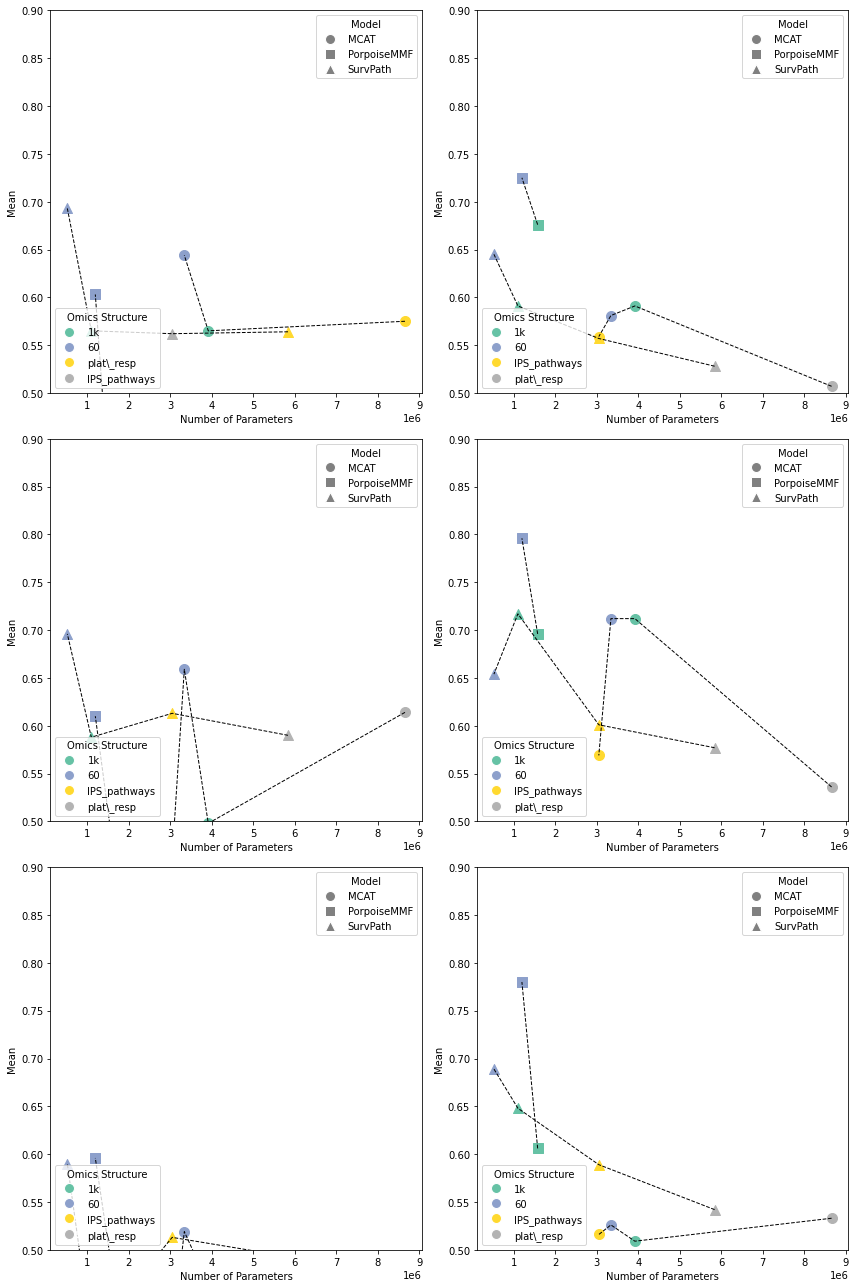

In [13]:
# HGSOC_platinum_responce/results_tables_dfs/HGSOC_train_test_e3.csv
exp= "HGSOC_UAB_hold_out"
exp= "HGSOC_train"
exp= "TCGA_train"

df1 = pd.read_csv("/mnt/ncshare/ozkilim/BRCA/HGSOC_platinum_responce/results_tables_dfs/"+exp+"_val_e5.csv")
df2 = pd.read_csv("/mnt/ncshare/ozkilim/BRCA/HGSOC_platinum_responce/results_tables_dfs/"+exp+"_test_e5.csv")

df3 = pd.read_csv("/mnt/ncshare/ozkilim/BRCA/HGSOC_platinum_responce/results_tables_dfs/"+exp+"_val_e4.csv")
df4 = pd.read_csv("/mnt/ncshare/ozkilim/BRCA/HGSOC_platinum_responce/results_tables_dfs/"+exp+"_test_e4.csv")

df5 = pd.read_csv("/mnt/ncshare/ozkilim/BRCA/HGSOC_platinum_responce/results_tables_dfs/"+exp+"_val_e3.csv")
df6 = pd.read_csv("/mnt/ncshare/ozkilim/BRCA/HGSOC_platinum_responce/results_tables_dfs/"+exp+"_test_e3.csv")

# from each df merge into one and take only the best model...
# Sample DataFrame list.
dfs = [df1, df2, df3, df4, df5, df6]  # Replace df1, df2, ... with your actual DataFrames

# Determine the layout
num_pairs = len(dfs) // 2 + len(dfs) % 2
fig, axs = plt.subplots(num_pairs, 2, figsize=(12, 6 * num_pairs))

# Flatten axs for easy iteration in case of a single row
axs = axs.flatten()

for i, df in enumerate(dfs):
    plot_df_on_ax(df, axs[i])

# If the number of DataFrames is odd, hide the last ax
if len(dfs) % 2 != 0:
    axs[-1].axis('off')

plt.tight_layout()
plt.show()

In [12]:
df1 = pd.read_csv("/mnt/ncshare/ozkilim/BRCA/HGSOC_platinum_responce/results_tables_dfs/TCGA_train_test_e4.csv")
df1.head()

,Unnamed: 0,model,category_primary,TCGA CTransPath_primary,TCGA OV_ViT_primary,TCGA ViT_primary,TCGA ensemble_primary,category_metastatic,TCGA CTransPath_metastatic,TCGA OV_ViT_metastatic,TCGA ViT_metastatic,TCGA ensemble_metastatic
0,0,1k protein ensemble,Omics,0.661±0.026,0.661±0.026,0.661±0.026,0.661±0.026,Omics,0.569±0.052,0.569±0.052,0.569±0.052,0.569±0.052
1,1,60 protein ensemble \cite{chowdhury2023proteog...,Omics,0.663±0.038,0.663±0.038,0.663±0.038,0.663±0.038,Omics,0.547±0.046,0.547±0.046,0.547±0.046,0.547±0.046
2,2,MCAT 1k \cite{chen2021multimodal},Multimodal,0.712±0.023,0.686±0.046,0.735±0.021,0.725±0.025,Multimodal,0.629±0.031,0.564±0.035,0.618±0.007,0.629±0.021
3,3,MCAT 60 \cite{chen2021multimodal},Multimodal,0.712±0.061,0.67±0.058,0.757±0.029,0.722±0.043,Multimodal,0.657±0.042,0.616±0.094,0.685±0.04,0.649±0.053
4,4,MCAT IPS_pathways \cite{chen2021multimodal},Multimodal,0.569±0.059,0.621±0.075,0.561±0.064,0.569±0.059,Multimodal,0.529±0.053,0.545±0.085,0.535±0.059,0.529±0.053
